In [333]:
import tensorflow as tf
import os

In [334]:
# Avoid OOM errors 
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu,True)

In [335]:
tf.config.list_physical_devices('GPU')

[]

# 1. Cleaning images 

In [336]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [337]:
data_dir = 'data' 

In [338]:
#Image Format
image_exists = ['jpeg','jpg', 'bmp', 'png']

In [339]:
image_exists

['jpeg', 'jpg', 'bmp', 'png']

In [340]:
os.listdir(data_dir)

['happy', 'sad']

In [341]:
#Check every single image for 5 first images
test=os.listdir(os.path.join(data_dir,'happy'))[:4]
test

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg']

In [342]:
img=cv2.imread(os.path.join('data','happy',test[0]))

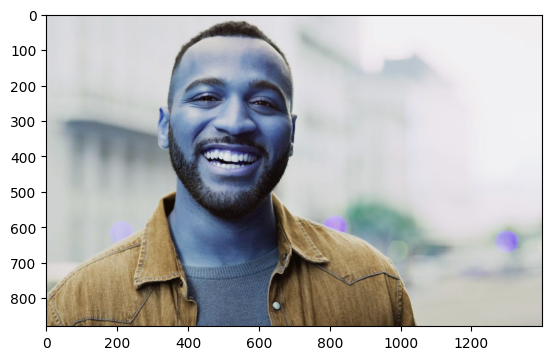

In [343]:
plt.imshow(img)
plt.show()

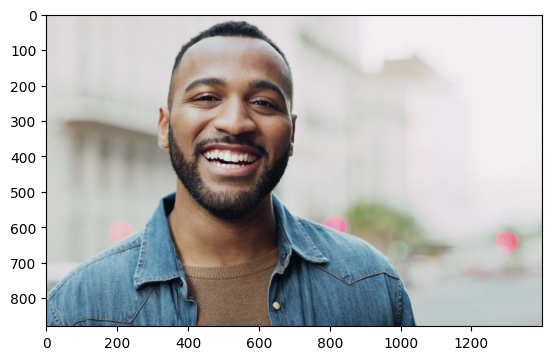

In [344]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [345]:
#looping throw every folder
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            #Image extension
            tip = imghdr.what(image_path)
            if tip not in image_exists: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# 2 .load data

In [346]:
import numpy as np
from matplotlib import pyplot as plt

In [347]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 306 files belonging to 2 classes.


In [348]:
data_iterator = data.as_numpy_iterator()

In [349]:
batch = data_iterator.next()

In [350]:
len(batch)

2

In [351]:
batch[0].shape

(32, 256, 256, 3)

In [352]:
batch[1]
# 0 for happy
# 1 for sad

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

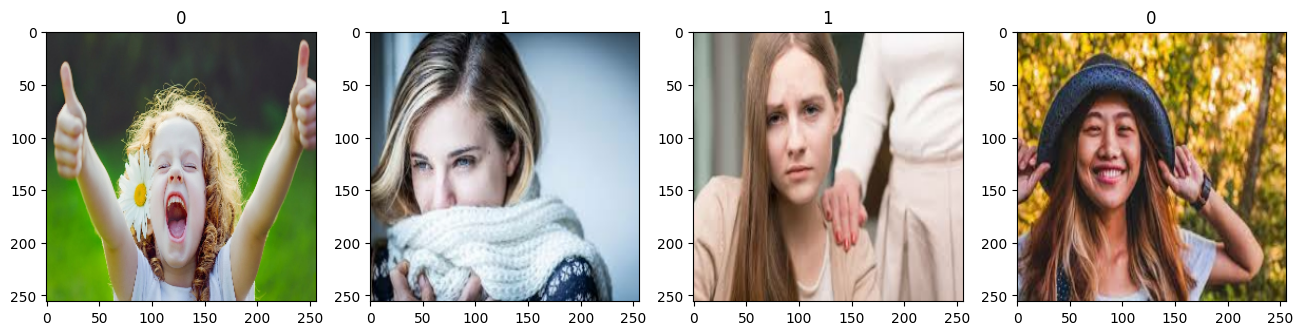

In [353]:
fig, ax =plt.subplots(ncols=4, figsize=(16,20))
for idx , img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [354]:
scale_data =data.map(lambda x,y : (x/255 ,y))

In [355]:
scale_data.as_numpy_iterator().next()[0][0]

array([[[0.6509804 , 0.7921569 , 0.85490197],
        [0.6509804 , 0.7924939 , 0.855913  ],
        [0.6509804 , 0.7940257 , 0.86050856],
        ...,
        [0.2489277 , 0.35481006, 0.437163  ],
        [0.24739583, 0.3532782 , 0.43563113],
        [0.24705882, 0.3529412 , 0.43529412]],

       [[0.65401345, 0.7948529 , 0.8586091 ],
        [0.65372384, 0.79492927, 0.85927254],
        [0.6524074 , 0.79527634, 0.8622884 ],
        ...,
        [0.25043634, 0.35631868, 0.43867165],
        [0.24877283, 0.35465518, 0.43700814],
        [0.24840686, 0.3542892 , 0.43664217]],

       [[0.66780025, 0.80710787, 0.87545955],
        [0.6661942 , 0.8059994 , 0.8745433 ],
        [0.6588939 , 0.800961  , 0.87037855],
        ...,
        [0.25729382, 0.36317617, 0.4455291 ],
        [0.25503194, 0.3609143 , 0.44326723],
        [0.2545343 , 0.36041668, 0.44276962]],

       ...,

       [[0.68517154, 0.57144606, 0.5910539 ],
        [0.6784946 , 0.5654431 , 0.58505094],
        [0.64814454, 0

In [356]:
scale_iter = scale_data.as_numpy_iterator()

In [357]:
batch = scale_iter.next()

In [358]:
batch

(array([[[[5.45978844e-01, 4.44018066e-01, 3.53821993e-01],
          [6.78446710e-01, 5.76049328e-01, 4.86726403e-01],
          [6.98246002e-01, 5.93091309e-01, 5.09283066e-01],
          ...,
          [4.80085790e-01, 3.25528502e-01, 2.94883579e-01],
          [3.74310672e-01, 2.53607541e-01, 2.15265006e-01],
          [2.89185047e-01, 1.71537995e-01, 1.32322297e-01]],
 
         [[7.33402848e-01, 6.22465372e-01, 5.30025125e-01],
          [7.72938907e-01, 6.62314296e-01, 5.70747197e-01],
          [7.46715009e-01, 6.38899744e-01, 5.53680122e-01],
          ...,
          [6.15569353e-01, 4.60433453e-01, 4.23056006e-01],
          [5.20927370e-01, 3.93991441e-01, 3.44927698e-01],
          [4.48105335e-01, 3.21564853e-01, 2.77610987e-01]],
 
         [[9.04807925e-01, 7.79362977e-01, 6.81825817e-01],
          [8.69713068e-01, 7.47184157e-01, 6.49561405e-01],
          [8.10672879e-01, 6.94531262e-01, 6.05296791e-01],
          ...,
          [7.53759563e-01, 6.00698173e-01, 5.4907

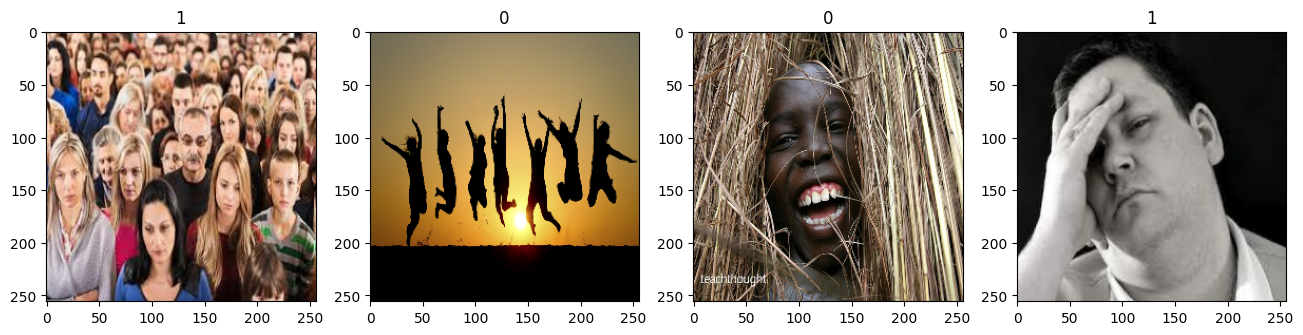

In [359]:
fig, ax =plt.subplots(ncols=4, figsize=(16,20))
for idx , img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 4. Split Data

In [360]:
data_len=len(scale_data)
data_len

10

In [361]:
#train take 7 Batchs
#val take 2
#test take 1
train_size = int(len(scale_data)*.7)
val_size = int(len(scale_data)*.2)
test_size = int(len(scale_data)*.1)

In [362]:
train_size #les batchs du train

7

In [363]:
train = scale_data.take(train_size)
val =  scale_data.skip(train_size).take(val_size)
test = scale_data.skip(train_size+val_size).take(test_size)

# 5. Build Deep Learning Model

In [364]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [365]:
model = Sequential()

In [366]:
#layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) 
#MaxPooling just take the maximum value after the relu activation

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())#take the output multi dimensions  to 1 dimension   

model.add(Dense(256, activation='relu')) 

model.add(Dense(1, activation='sigmoid'))

In [367]:
#optimisation
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [368]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

# 6. Train

In [369]:
logdir='logs'

In [370]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [371]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 5s 575ms/step - loss: 1.0853 - accuracy: 0.5580 - val_loss: 0.8149 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 5s 557ms/step - loss: 0.7198 - accuracy: 0.5134 - val_loss: 0.6825 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 5s 549ms/step - loss: 0.6692 - accuracy: 0.5759 - val_loss: 0.6192 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 5s 539ms/step - loss: 0.5928 - accuracy: 0.6964 - val_loss: 0.4900 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 5s 540ms/step - loss: 0.4543 - accuracy: 0.7768 - val_loss: 0.3835 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 5s 548ms/step - loss: 0.3828 - accuracy: 0.8438 - val_loss: 0.3184 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 5s 539ms/step - loss: 0.3337 - accuracy: 0.8616 - val_loss: 0.2753 - val_accuracy: 0.9375
Epoch 8/20
7/7 [====

# 7. Plot Performance

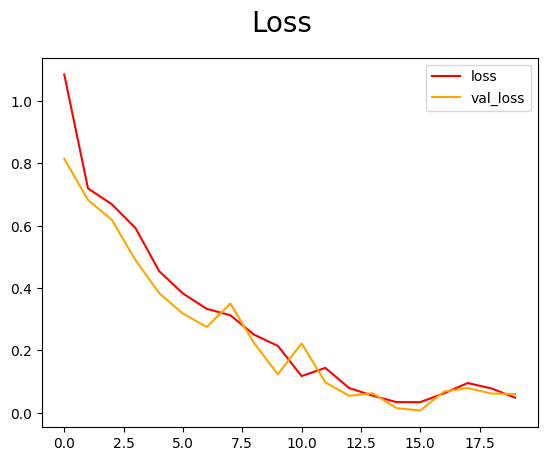

In [372]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()


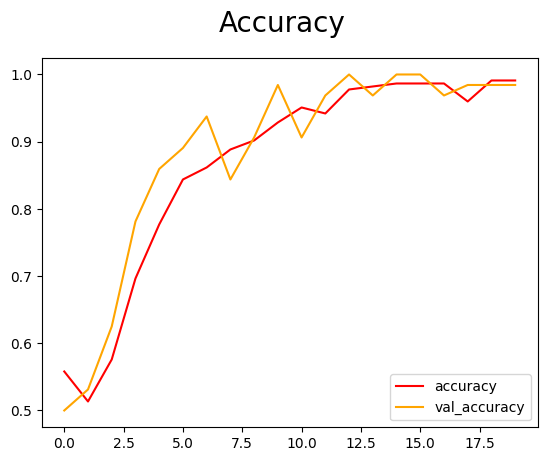

In [373]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# 8. Evaluate

In [374]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [375]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [376]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    predict = model.predict(X)
    pre.update_state(y, predict)
    re.update_state(y, predict)
    acc.update_state(y, predict)

1/1 [==============================] - 0s 91ms/step


# 9. Test

In [377]:
import cv2

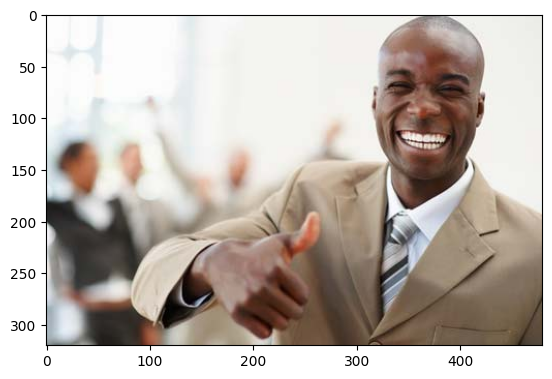

In [442]:
img = cv2.imread('gentille.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

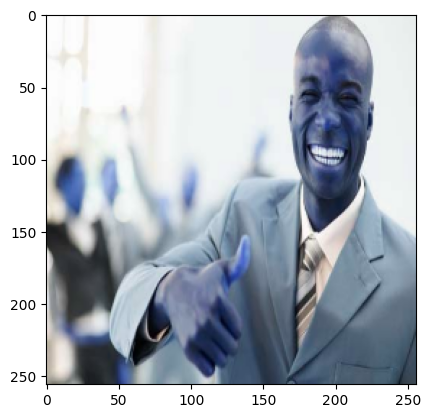

In [443]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [444]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[253.      , 253.      , 253.      ],
        [253.      , 253.      , 253.      ],
        [253.      , 253.      , 253.      ],
        ...,
        [231.      , 236.      , 235.      ],
        [231.      , 236.      , 235.      ],
        [231.      , 236.      , 235.      ]],

       [[253.      , 253.      , 253.      ],
        [253.      , 253.      , 253.      ],
        [253.      , 253.      , 253.      ],
        ...,
        [231.      , 236.      , 235.      ],
        [231.      , 236.      , 235.      ],
        [231.      , 236.      , 235.      ]],

       [[253.      , 253.      , 253.      ],
        [253.      , 253.      , 253.      ],
        [253.      , 253.      , 253.      ],
        ...,
        [231.      , 236.      , 235.      ],
        [231.      , 236.      , 235.      ],
        [231.      , 236.      , 235.      ]],

       ...,

       [[164.47656 , 162.47656 , 152.47656 ],
        [162.

In [445]:
# we need to encapsulate it inside of other set array or list
np.expand_dims(resize, 0)

array([[[[253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         ...,
         [231.      , 236.      , 235.      ],
         [231.      , 236.      , 235.      ],
         [231.      , 236.      , 235.      ]],

        [[253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         ...,
         [231.      , 236.      , 235.      ],
         [231.      , 236.      , 235.      ],
         [231.      , 236.      , 235.      ]],

        [[253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         [253.      , 253.      , 253.      ],
         ...,
         [231.      , 236.      , 235.      ],
         [231.      , 236.      , 235.      ],
         [231.      , 236.      , 235.      ]],

        ...,

        [[164.47656 , 162.47656 , 152.47656 ],
         [162.5     , 160.5     , 150.5     ]

In [446]:
predict = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [447]:
predict

array([[0.03745779]], dtype=float32)

In [448]:
if predict > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
